## Quiz #0501

### "Logistic Regression and Gradient Descent Algorithm"

#### Answer the following questions by providing Python code:
#### Objectives:
- Code a logistic regression class using only the NumPy library.
- Implement in Python the Sigmoid function.
- Implement in Python the Gradient of the logarithmic likelihood.
- Implement in Python the Gradient Descent Algorithm.

In [30]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import math
np.random.seed(0)

#### Read in data:

In [72]:
# Load data.
data = load_breast_cancer()
# Explanatory variables.
X = data['data']
# Relabel such that 0 = 'benign' and 1 = malignant.
Y = 1 - data['target']

In [73]:
# Split the dataset into training and testing.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=1234)

1). Define the 'sigmoid' and 'gradient' functions to produce the output shown below:

In [74]:
def sigmoid(x):
    sig = 1 / (1 + np.exp(-x))
    return sig

def gradient(X, Y, beta):
    z = np.dot(X,beta.T)*Y
    ds = -Y*(1-sigmoid(z))*X
    return ds.sum(axis=0)

2). Define the 'LogisticRegression' class to produce the output shown below:

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [81]:

class LogisticRegression:
    def __init__(self, learning_rate):
        self.lr = learning_rate
        self.theta = None
    def sigmoid(self, z):
        return 1/(1+np.exp(-z))
    def hypothesis(self, X, theta):
        return self.sigmoid(X @ theta)
    def train(self, X, y, iteration):
        J_hist = []
        theta = np.zeros([3, 1])
        m = len(X)
        for i in tqdm(range(iteration)):
            h = self.hypothesis(X, theta)
            updte = self.lr/m * np.transpose(X).dot(h-y)
            J_hist.append(self.compute_cost(X, y, theta))
            theta -= updte
            self.theta = theta
        return theta, J_hist
    def compute_cost(self, X, y, theta):
        h = self.hypothesis(X, theta)
        m = len(X)
        J = 1/(m) * np.sum((np.transpose(-y) @ np.log(h) - np.transpose(1-y) @ np.log(1-h)))
        return J
    def accuracy(self, X, y, theta):
        pred = self.sigmoid(X @ theta)
        for i in range(len(pred)):
            if pred[i] > 0.5:
                pred[i] = 1
            else:
                pred[i] = 0
        return np.mean(pred == y) * 100
    def query(self, X_test, prob=True , cuttoff=0.5):
        y_test = self.hypothesis(X_test, self.theta)
        if y_test >= cuttoff:
            return prob
        else:
            return not prob


#### Sample run:

In [77]:
# Hyperparameter for the learner.
learning_rate = 0.001

100%|██████████████████████████████████████████████████████████████████████████████| 900/900 [00:00<00:00, 4536.68it/s]



Accuracy =  83.33333333333334


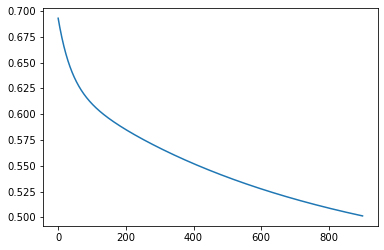

In [80]:
# Train and predict.
LR = LogisticRegression(learning_rate)
theta, J_hist = LR.train(X, Y, 900)
plt.plot(range(900), J_hist)
print('\nAccuracy = ', LR.accuracy(X,Y,theta))

In [63]:
# Display the accuracy.
print('\nAccuracy =', LR.accuracy(X,Y,theta))


Accuracy =  83.33333333333334


In [93]:
LR = LogisticRegression(learning_rate)
LR.train(X_train, Y_train, 2000)
Y_pred = LR.query(X_test,prob=True,cuttoff=0.5)

100%|████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:00<00:00, 6265.66it/s]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()